# Vezba 1 - Osnovna klasifikacija

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
#df.drop(['area_code]', axis = 1)

In [5]:
X = df.drop('churn', axis=1)
y = df['churn']

#X = df.iloc[:, :-1] #Uzimamo sve kolone osim poslednje
#y = df.iloc[:, -1] #Uzimamo poslednju kolonu

In [6]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [7]:
X.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [8]:
X["area_code"]       

0       area_code_415
1       area_code_415
2       area_code_408
3       area_code_415
4       area_code_510
            ...      
4245    area_code_415
4246    area_code_408
4247    area_code_408
4248    area_code_408
4249    area_code_415
Name: area_code, Length: 4250, dtype: object

In [9]:
X = df.select_dtypes(include=['int64', 'float64'])

In [10]:
#X.drop(['area_code'], axis = 1)

In [11]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)

In [13]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [14]:
model.predict(X)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [15]:
pd.DataFrame({'stvarno':y,'predvidjeno':model.predict(X)}).head(15)

,stvarno,predvidjeno
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
5,no,no
6,no,no
7,no,no
8,yes,yes
9,no,no


In [16]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X)
accuracy_score(y, predictions)
f'Naš model je {round(accuracy_score(y, model.predict(X)) * 100, 2)}% tačan'

'Naš model je 91.22% tačan'

### Other algorithms

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.8870588235294118

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.908

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.8611764705882353

### Complex model and Decision boundaries

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.9336470588235294

# Vezba 2 - Evaluation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [22]:
model = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8596078431372549

In [23]:
model = GaussianNB().fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.883921568627451

In [24]:
model = KNeighborsClassifier().fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8776470588235294

In [25]:
model = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8541176470588235

In [26]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.912156862745098

ponavljan vise puta... varijabilnost rezultata!

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8674509803921568

### X-Val  (prvo slajd)

In [28]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(max_depth=20)
results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(results)

[0.86117647 0.86352941 0.88941176 0.87764706 0.87529412 0.88
 0.87764706 0.86823529 0.86117647 0.88705882]


In [29]:
print(results.mean(),results.std())

0.8741176470588237 0.009715681328029442


### Kriva učenja (prvo slajd)

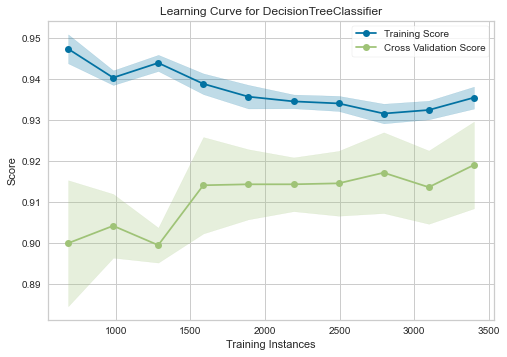

In [30]:
#!pip install yellowbrick
from yellowbrick.model_selection import LearningCurve
model = DecisionTreeClassifier(max_depth=5)
steps = np.linspace(0.2, 1.0, 10)
visualizer = LearningCurve(model, cv=5, scoring='accuracy', train_sizes=steps, n_jobs=4)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show();

# Vezba 3 - Metrike evaluacije

## Baseline model

In [31]:
y.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [32]:
predictions = np.repeat(0, len(y))

In [33]:
y = y.astype('bool')

In [34]:
y.dtype

dtype('bool')

In [35]:
predictions.dtype

dtype('int32')

In [36]:
accuracy_score(y, predictions)

0.0

### Metrike

In [37]:
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(X,y)
confusion_matrix(y_true=y, y_pred=model.predict(X))

array([[4250]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_hat = model.predict(X)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = f1_score(y, y_hat)
f'Mere performansi modela su {np.round(prec * 100, 2)}% preciznosti, {np.round(rec * 100, 2)}% odziva i {np.round(f1 * 100, 2)}% F mere'

'Mere performansi modela su 100.0% preciznosti, 100.0% odziva i 100.0% F mere'

In [39]:
cross_val_score(model, X, y, cv=10, scoring='precision').mean()

1.0

### Cene gresaka

In [40]:
confusion_matrix(y, model.predict(X))

array([[4250]], dtype=int64)

In [41]:
costs = np.array([[0, 5], [1, 0]])
costs

array([[0, 5],
       [1, 0]])

In [42]:
confusion_matrix(y, model.predict(X)) * costs

array([[    0, 21250],
       [ 4250,     0]], dtype=int64)

In [43]:
(confusion_matrix(y, model.predict(X)) * costs).sum().sum()

25500

In [44]:
def matrica_troskova(y_true, y_pred, costs):
    conf_max = confusion_matrix(y_true, y_pred)
    return (conf_max * costs).sum()/conf_max.sum()

In [45]:
matrica_troskova(y,model.predict(X), costs)

6.0

In [46]:
from sklearn.metrics import make_scorer
costs_scorer = make_scorer(matrica_troskova, costs=costs, greater_is_better=False)

In [56]:
#cross_val_score(LogisticRegression(), X, y, cv=10, scoring=costs_scorer)

# Vezba 4 - Granice odluke i AUC

In [57]:
model = LogisticRegression().fit(X, y)
probas = model.predict_proba(X)
probas

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: True

In [48]:
res = pd.DataFrame({'stvarno': y, 'predvidjeno': probas[:, 1]})
res.head()

NameError: name 'probas' is not defined

In [49]:
confusion_matrix(y, model.predict(X))

array([[4250]], dtype=int64)

In [54]:
model.predict_proba(X)[:, 1]

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [50]:
predictions = model.predict_proba(X)[:, 1] >= 0.2
confusion_matrix(y, predictions)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
model = LogisticRegression()
model.fit(X, y)
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: True

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model.predict_proba(X)[:, 1])

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [53]:
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(results.mean())
print(results.std())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stefanve\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stefanve\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1183, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: True
